In [1]:
import pandas as pd
import joblib

# Load model, scaler, threshold
model = joblib.load("../models/fraud_model.pkl")
scaler = joblib.load("../models/scaler.pkl")

# Load raw data
df = pd.read_csv("../data/creditcard.csv")


In [2]:
fraud_df = df[df["Class"] == 0].drop("Class", axis=1)
fraud_df.shape


(284315, 30)

In [3]:
fraud_scaled = scaler.transform(fraud_df)

In [4]:
fraud_probs = model.predict_proba(fraud_scaled)[:,0]

In [5]:
import numpy as np

print("Min:", fraud_probs.min())
print("Mean:", fraud_probs.mean())
print("Median:", np.median(fraud_probs))
print("Max:", fraud_probs.max())

Min: 0.00042146289437967064
Mean: 0.9863383445556846
Median: 0.9918505257288598
Max: 1.0


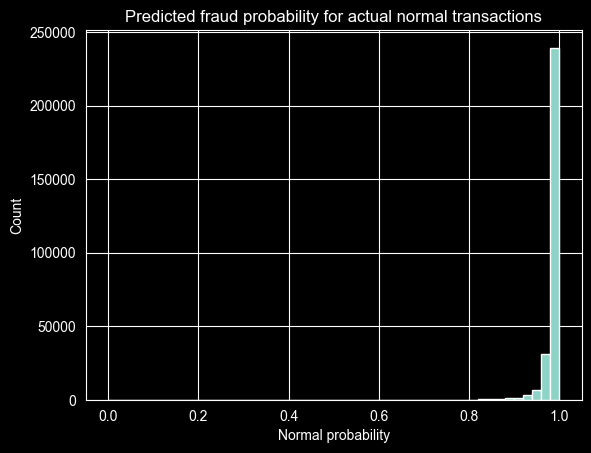

In [7]:
import matplotlib.pyplot as plt

plt.hist(fraud_probs, bins=50)
plt.title("Predicted fraud probability for actual normal transactions")
plt.xlabel("Normal probability")
plt.ylabel("Count")
plt.show()

In [8]:
threshold = joblib.load("../models/threshold.pkl")

below = (fraud_probs < threshold).sum()
above = (fraud_probs >= threshold).sum()

below, above


(np.int64(2), np.int64(284313))